# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)
Student Name and ID:  <-- Only this student will submit the assignment

Student Name and ID:


Notes: When submitting, fill your name and ID in this cell. [1 point]

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions ( 2 Points)


Step 3: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

## Programming Assignment Details (25 Points)



For this assignment use Jupyter notebook, Panda, and scikit.

1) Load iris dataset from sklearn datasets. [1 points]


2) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]


3) Select only 2 attributes for training and testing your model. [2 points]


4) Use Euclidean distance. [3 points]


5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]


6) Use comments to explain your code and variable names.[2 points]


7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]


8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

## Report (20 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:


1) Describe the Nearest Neighbors method, [5 points]


2) Explain what was your criteria for selecting the two attributes, [5 points]


3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[5 points]


4) Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## Canvas Submission (2 Points)

Step 5 : Submit your zipped folder containing PA#2_Classification_yourLastName (PA#2_Classification_yourLastName.zip) on Canvas

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def knn(n_neighbors):
    
  iris = datasets.load_iris() # Load iris dataset from sklearn datasets.
  X = iris.data[:, :2] # selecting the last 2 attributes
  y = iris.target # selecting the class attribute
  # n_neighbors = 3
  # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
  neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean') # using euclidean distance
  neigh.fit(X, y) # fitting the model
  y_predict = neigh.predict(X_test) # predicting the test dataset
  from sklearn.metrics import accuracy_score
  print("The Accuracy is:", accuracy_score(y_test,y_predict)*100,"\n")
  print("Confusion Matrix is: \n",confusion_matrix(y_test,y_predict),'\n')
  print("Classification Report: \n",classification_report(y_test,y_predict))
 
  h = .02  # step size in the mesh
 
  # Create color maps
  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
 
  # Reference: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
  for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
 
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
  plt.show() # plotting the classifier

### KNN with 3 neighbours 

The Accuracy is: 80.0 

Confusion Matrix is: 
 [[14  0  0]
 [ 0 12  6]
 [ 0  3 10]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.67      0.73        18
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.81      0.80      0.80        45



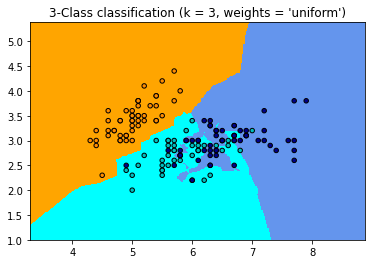

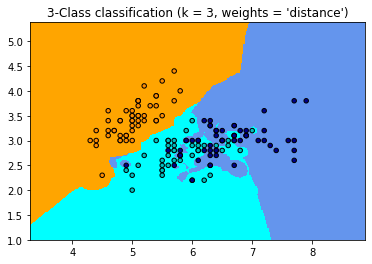

In [ ]:
knn(n_neighbors=3)

## KNN with 10 neighbours

The Accuracy is: 86.66666666666667 

Confusion Matrix is: 
 [[14  0  0]
 [ 0 15  3]
 [ 0  3 10]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      0.83      0.83        18
           2       0.77      0.77      0.77        13

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



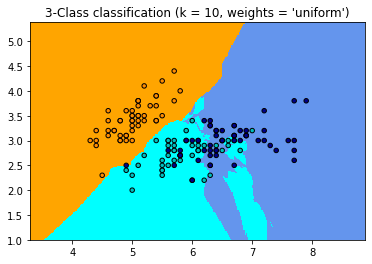

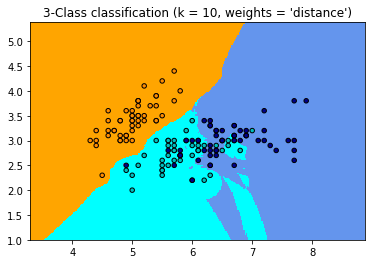

In [ ]:
knn(n_neighbors=10)

## KNN with 19 neighbours

The Accuracy is: 80.0 

Confusion Matrix is: 
 [[14  0  0]
 [ 0 11  7]
 [ 0  2 11]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.85      0.61      0.71        18
           2       0.61      0.85      0.71        13

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.81        45
weighted avg       0.83      0.80      0.80        45



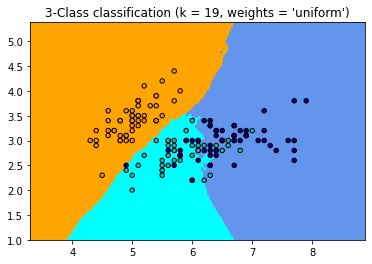

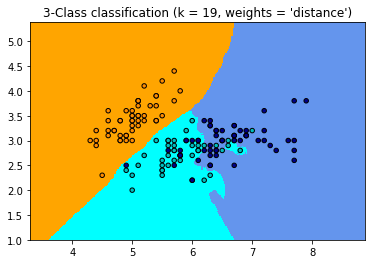

In [ ]:
knn(n_neighbors=19)

# Using weka to classify

### using IBk (Instance Based Learner), which is the implementation of k-nearest neighbor algorithm (kNN) in Weka.

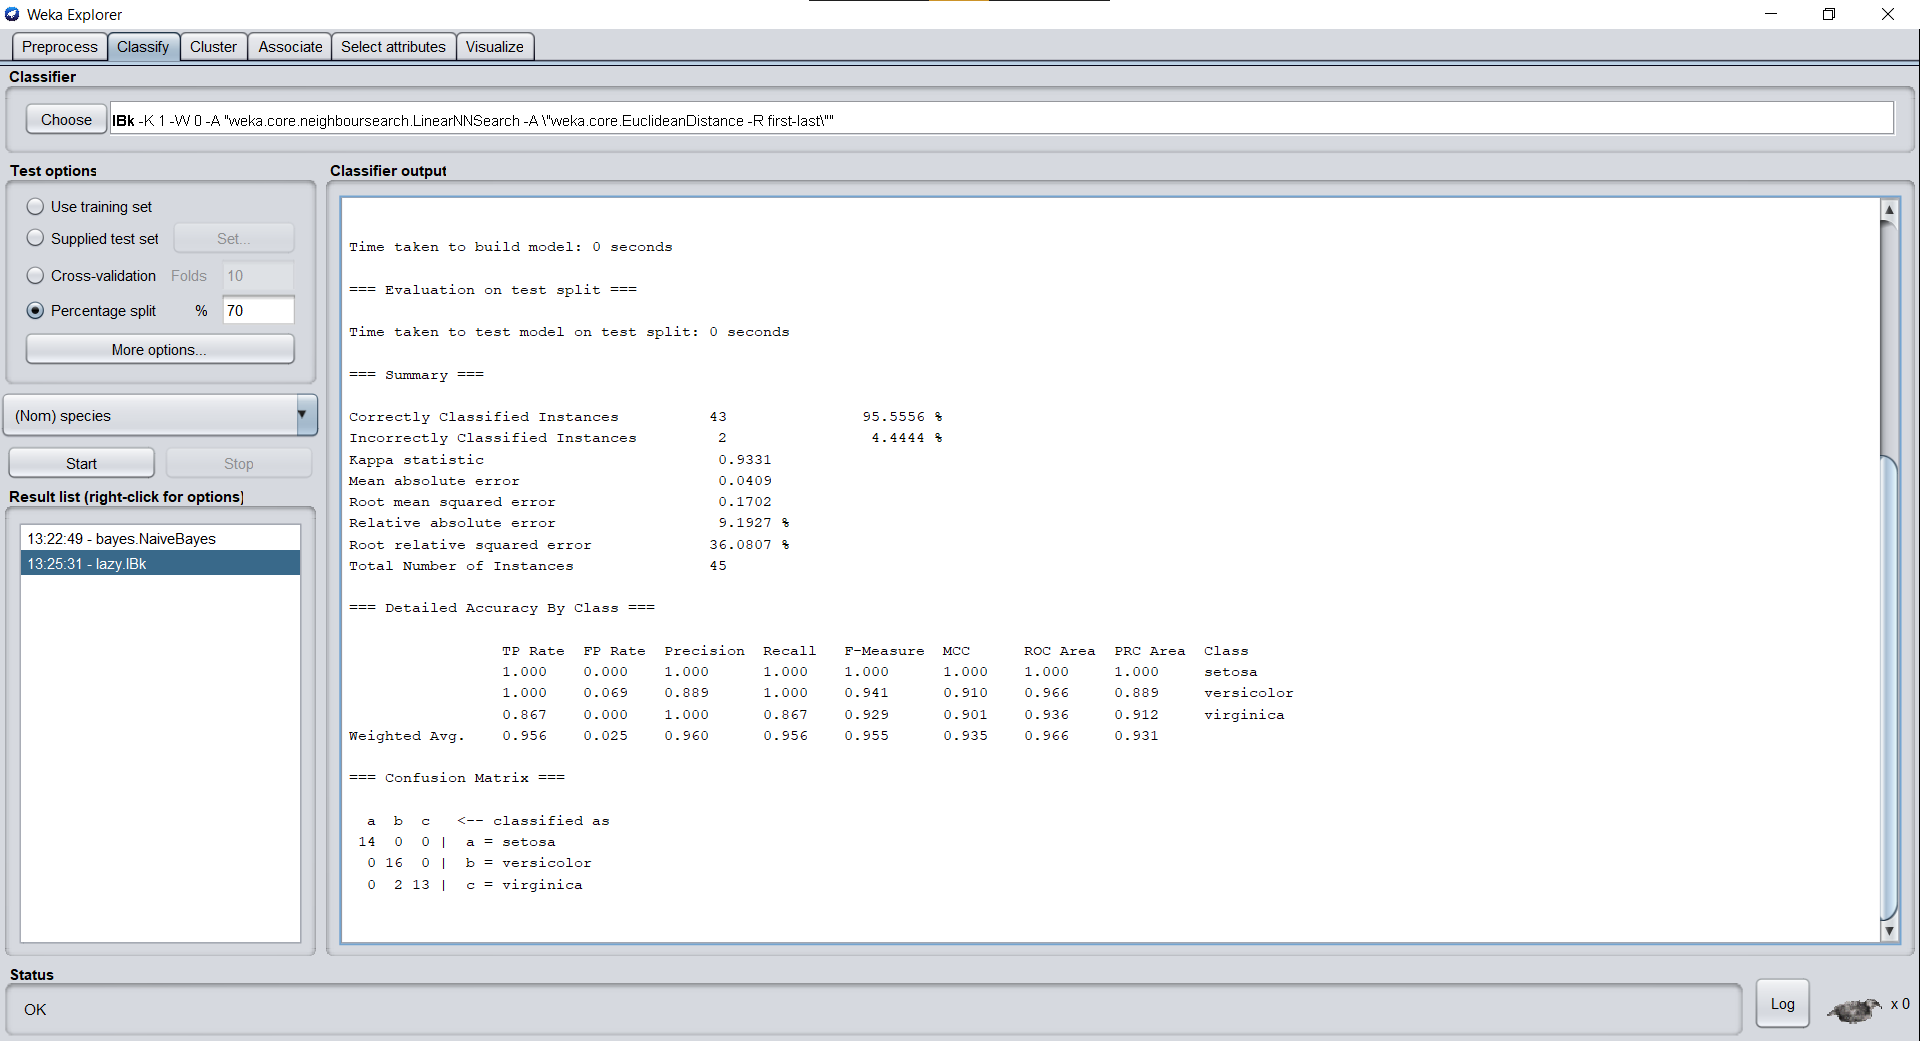

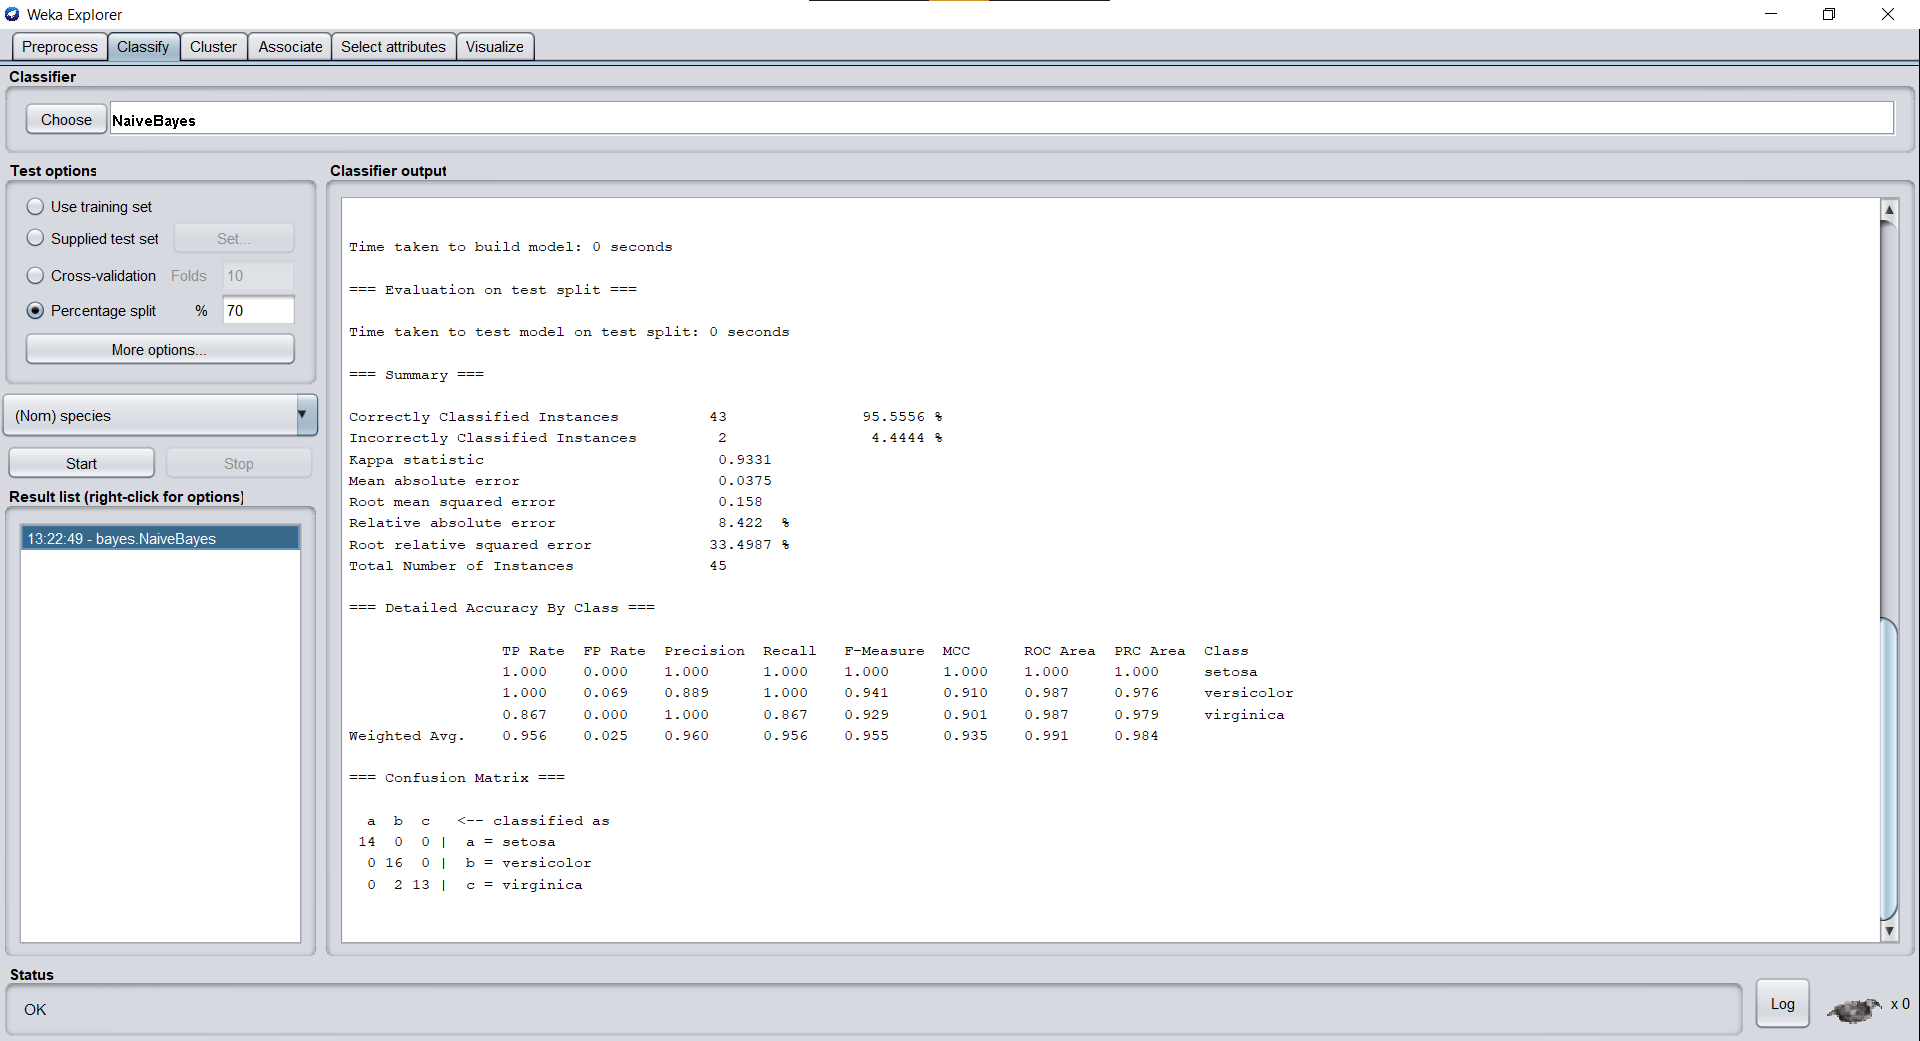